# 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자


## 라이브러리 버전을 확인해 봅니다


- Import

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import glob
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


- 함수 정의

In [29]:
def resize_images(img_path):
  '''이미지 리사이즈'''

  images = glob.glob(img_path+ "/*.jpg")
  print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	
  target_size=(28,28)
  for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")
    
  print(len(images), " images resized.")
 

def load_data(img_path, number_of_data):           # 가위바위보 이미지 개수 총합에 주의하세요.
    '''이미지 경로와 이미지 총 개수를 받으면 이미지를 읽고 배열로 바꿔서 클래스를 나눠주는 함수'''  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rocks/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/papers/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"개입니다.")
    return imgs, labels



## 데이터를 준비하자


- 데이터 불러오기 + Resize 하기  

*28x28* 사이즈로 변경



In [25]:
# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# scissors_dir_path = "/content/drive/MyDrive/Colab Notebooks/Exploration/rock_scissor_paper/train/scissors"
# resize_images(scissors_dir_path)

# print("가위 이미지 resize 완료!")

# # 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# rocks_dir_path = "/content/drive/MyDrive/Colab Notebooks/Exploration/rock_scissor_paper/train/rocks"
# resize_images(rocks_dir_path)

# print("바위 이미지 resize 완료!")

# # 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# papers_dir_path = "/content/drive/MyDrive/Colab Notebooks/Exploration/rock_scissor_paper/train/papers"
# resize_images(papers_dir_path)

# print("보 이미지 resize 완료!")

600  images to be resized.
600  images resized.
바위 이미지 resize 완료!
600  images to be resized.
600  images resized.
보 이미지 resize 완료!


- Resize한 데이터 불러오기

In [31]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/rock_scissor_paper/train'
number_of_data = 1800

X, y = load_data(img_path,number_of_data)

학습데이터(x_train)의 이미지 개수는 1800 개입니다.


## 데이터 정규화

In [42]:
X_norm = X/255.0   # 입력은 0~1 사이의 값으로 정규화

print("X_norm shape: {}".format(X_norm.shape))
print("y shape: {}".format(y.shape))

X_norm shape: (1800, 28, 28, 3)
y shape: (1800,)


라벨:  2


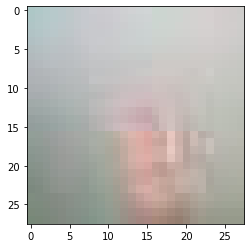

In [38]:
plt.imshow(X[1400])
print('라벨: ', y[1400])

## 데이터 학습/검증 나누기

In [43]:
X_train, X_validation, y_train, y_validation = train_test_split(X_norm,
                                                                y,
                                                                test_size=300/1800,
                                                                random_state=15)

## 딥러닝 네트워크 설계하기


In [40]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (No

## 딥러닝 네트워크 학습시키기


In [49]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=19)

Epoch 1/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.9073
Epoch 2/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9120
Epoch 3/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9253
Epoch 4/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9233
Epoch 5/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9300
Epoch 6/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9200
Epoch 7/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9267
Epoch 8/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9293
Epoch 9/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2206 - accuracy: 0.9267
Epoch 10/19
47/47 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9347
Epoch 11/19
47/47 [

## 얼마나 잘 만들었는지 확인하기(테스트)


In [50]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
test_loss, test_accuracy = model.evaluate(X_validation,y_validation, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.3985 - accuracy: 0.8467 - 166ms/epoch - 17ms/step
test_loss: 0.3984566628932953
test_accuracy: 0.846666693687439


In [52]:
# model을 학습시키는 코드를 직접 작성해 보세요.
predicted_result = model.predict(X_validation)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_validation[idx])

model.predict() 결과 :  [5.2874887e-01 4.7110426e-01 1.4682466e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  1


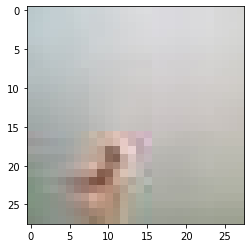

In [53]:
plt.imshow(X_validation[idx],cmap=plt.cm.binary)
plt.show()

In [60]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=19                   # epoch 변경

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(X_validation, y_validation, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 32)               

## test로 확인해보기

In [56]:
# test data 리사이즈

test_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/rock_scissor_paper/test'

# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# scissors_dir_path = test_path+ "/scissors"
# resize_images(scissors_dir_path)

# print("가위 이미지 resize 완료!")

# # 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# rocks_dir_path = test_path+"/rocks"
# resize_images(rocks_dir_path)

# print("바위 이미지 resize 완료!")

# # 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# papers_dir_path = test_path+"/papers"
# resize_images(papers_dir_path)

# print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [57]:
# 불러오기 

img_path = test_path
number_of_data = 300

X_test, y_test = load_data(img_path,number_of_data)

학습데이터(x_train)의 이미지 개수는 300 개입니다.


In [58]:
X_test_norm = X_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("X_norm shape: {}".format(X_test_norm.shape))
print("y shape: {}".format(y_test.shape))

X_norm shape: (300, 28, 28, 3)
y shape: (300,)


In [61]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.7833 - accuracy: 0.6800 - 33ms/epoch - 3ms/step
test_loss: 0.7832898497581482 
test_accuracy: 0.6800000071525574
